<h1>Objectives</h1>
    <p>To predict weather the patient will survive 5 years or more from the date of ooeration on the basis of 
    age, number of positive auxilary nodes and year of operation</p>

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#load kaggle dataset
haberman = pd.read_csv("/home/indra/Downloads/haberman.csv",)
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
#Number of data-points and features
print(haberman.shape)

In [11]:
# Name of colummn in dataset
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [14]:
haberman["status"].value_counts()



1    225
2     81
Name: status, dtype: int64

Description
The dataset has two sets of survival status, 1 being set of people who lived more than 5 years after treatment 
and 2 being people who died within 5 years


there are 25 contains 225 values and class 2 contains 81 values. since there is a huge number of difference in the amountof data, the dataset is imbalanced


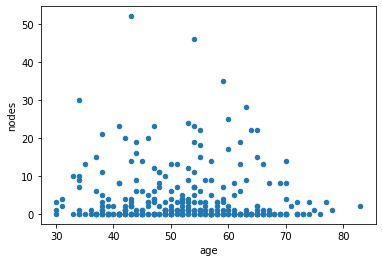

In [23]:
#2-D scatter plot
haberman.plot(kind = "scatter", x="age", y="nodes")

In [27]:
data_survived = haberman.loc[haberman["status"]==1]
print("Basic statistics of patients who survived more five years")
data_survived.describe()

Basic statistics of patients who survived more five years


,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [29]:
data_dead = haberman.loc[haberman["status"]==2]
print("Basic statistics of patients who died before five years")
data_dead.describe()

Basic statistics of patients who died before five years


,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


<h1> observation </h1>
abouot 75% of the patients who survived had positive auxilary nodes less than or equal to 3 whereas about 75% of people who died had positive auxilary nodes less than or equal to 11. this shows that the parameter which varies most among living and dead people is no. of positive auxilary nodes

number of positive auxilary nodes is not sufficient to predict since people having 0 nodes also died (min = 0)


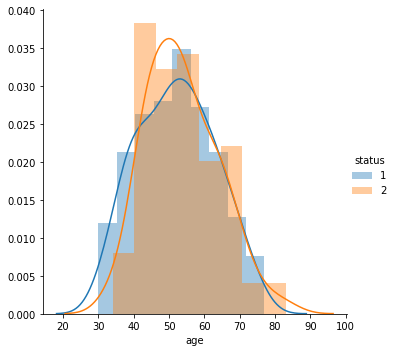

In [36]:
#histogram
#status in relation with age of operatiomn
sns.FacetGrid(haberman, hue="status", height = 5).map(
sns.distplot, "age"
).add_legend();
plt.show()



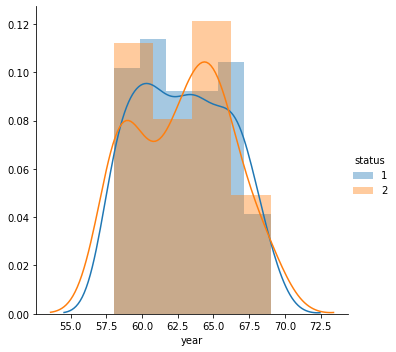

In [38]:
#histogram 
#status in relation with year of operation
sns.FacetGrid(haberman, hue="status", height = 5).map(
sns.distplot, "year"
).add_legend();
plt.show()


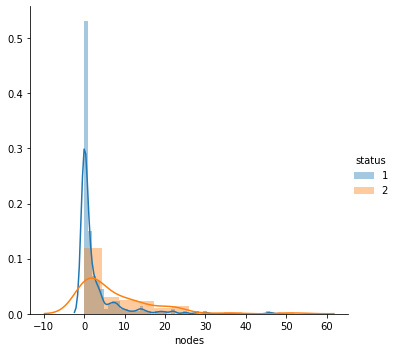

In [39]:
#histogram 
#status in relation with number of nodes
sns.FacetGrid(haberman, hue="status", height = 5).map(
sns.distplot, "nodes"
).add_legend();
plt.show()


<h1> Univariant analysis </h1>


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


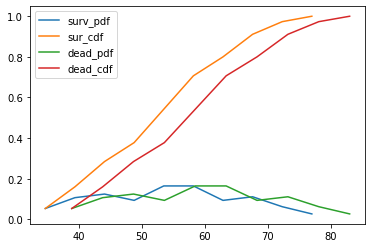

In [43]:
counts, bin_edges = np.histogram(data_survived["age"] , bins=10, density= True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute cumulative density function
cdf = np.cumsum(pdf)



plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
ounts, bin_edges = np.histogram(data_dead["age"] , bins=10, density= True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute cumulative density function
cdf = np.cumsum(pdf)



plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['surv_pdf', 'sur_cdf', "dead_pdf", 'dead_cdf'])

<h1> Pdf and cdf on the basis of number of nodes </h1>

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


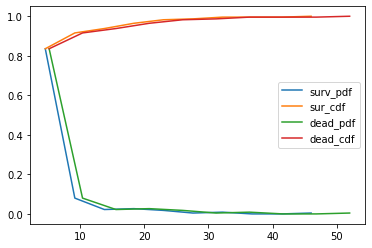

In [45]:
counts, bin_edges = np.histogram(data_survived["nodes"] , bins=10, density= True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute cumulative density function
cdf = np.cumsum(pdf)



plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
ounts, bin_edges = np.histogram(data_dead["nodes"] , bins=10, density= True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute cumulative density function
cdf = np.cumsum(pdf)



plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['surv_pdf', 'sur_cdf', "dead_pdf", 'dead_cdf'])

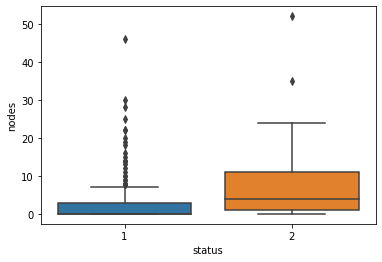

In [48]:
#box variant

sns.boxplot(x= "status" , y="nodes", data= haberman)

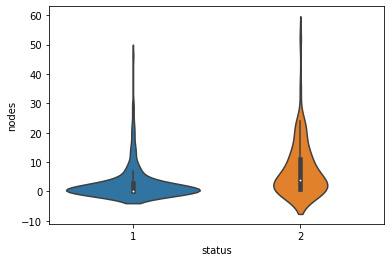

In [50]:
sns.violinplot(x = "status", y = "nodes", data=haberman)

<h1>Observation </h1>
<li> 
    <ol>  about 50% of patients who survived had 0 positive auxilary nodes</ol>
    <ol> As the number of Auxialry nodes increases, the chances of living decreases </ol>

</li>